In [1]:
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression  # or DecisionTreeClassifier
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

# Data collection with pandas
 Load the data


In [3]:
df = pd.read_excel(r"C:\Users\YOMI\OneDrive\Downloads\Dataset.xlsx")
df.head()


,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


# Data Explorartion
We will be looking at understanding the data structure, statistics, an quality of the dataset,
Visualizing to get insights
Check for missing values.



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              12483 non-null  int64 
 1   Name                    12483 non-null  object
 2   Age                     12483 non-null  int64 
 3   Gender                  12483 non-null  object
 4   Location                12483 non-null  object
 5   Email                   12483 non-null  object
 6   Phone                   12483 non-null  object
 7   Address                 12483 non-null  object
 8   Segment                 12483 non-null  object
 9   PurchaseHistory         12483 non-null  object
 10  SubscriptionDetails     12483 non-null  object
 11  ServiceInteractions     12483 non-null  object
 12  PaymentHistory          12483 non-null  object
 13  WebsiteUsage            12483 non-null  object
 14  ClickstreamData         12483 non-null  object
 15  En

In [13]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)



CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64


In [18]:
# Checking for duplicate rows
print(df.duplicated().any)


<bound method Series.any of 0        False
1        False
2        False
3        False
4        False
         ...  
12478    False
12479    False
12480    False
12481    False
12482    False
Length: 12483, dtype: bool>


 Statistical Overview of the numerical columns in the dataset
In other to understand the dataset

In [20]:
# When using describe() we do not need to specify
# to use numerical values the function automatically knows
# Balanced dataset- 1
# Imbalanced dataset- 0
starts_overview = df.describe()
print(starts_overview)

        CustomerID           Age           NPS    ChurnLabel
count  12483.00000  12483.000000  12483.000000  12483.000000
mean    7242.00000     43.930065      2.973884      0.505808
std     3603.67604     15.341521      2.644623      0.499986
min     1001.00000     18.000000      0.000000      0.000000
25%     4121.50000     31.000000      1.000000      0.000000
50%     7242.00000     44.000000      2.000000      1.000000
75%    10362.50000     57.000000      4.000000      1.000000
max    13483.00000     70.000000      9.000000      1.000000


Next we see how the target variable 'ChurnLabel', and some of the other variables are distributed
using matplotlib and seaborn


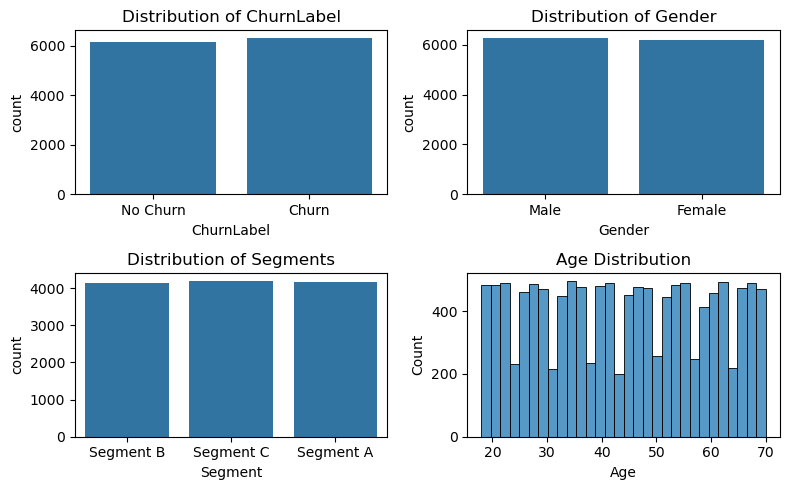

In [30]:
# Set up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))

# Plot the distribution of the traget variable- 'ChurnLabel'
sns.countplot(x='ChurnLabel', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of ChurnLabel')
ax[0, 0].set_xticklabels(['No Churn', 'Churn'])

# Plot distribution of the Gender
sns.countplot(x='Gender', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Gender')

# Plot distribution of segments
sns.countplot(x='Segment', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Segments')

# Age distribution with histogram plot
sns.histplot(df['Age'], bins=30, ax=ax[1, 1])   # bins- num of bars you want to have for your hist. plot
ax[1, 1].set_title('Age Distribution')

plt.tight_layout()   # To make the plot fit together
# plt.show()

# Correlation analysis 
 Correlation analysis is how much two variables move together. There are two types of correlatio:n# Positive correlation- As one column goes up, the other goes up as welNegative correlation- As one goes up, the other goes down.
Perfect Correlation is indicated by a value of one, weak correlation - 0
Moderate Correlation- 0.5
When there are no relationship between the columns we can say there are no relationship
It is how much two variables move together.
Which columns in the dataset correlates with the 'ChurnLabel' column
When you understand, you get to know which columns has higher influence with the 'ChurnLabel' Column
 Column



In [34]:
# Correlation with ChurnLabel
# We are telling pandas to give us the rows with numerical values in other to do te correlation
# .corr allows you to complete your correlation
correlation = df.select_dtypes(include=np.number).corr()['ChurnLabel'].sort_values(ascending=False)


ChurnLabel    1.000000
Age           0.010273
CustomerID    0.001530
NPS          -0.540703
Name: ChurnLabel, dtype: float64


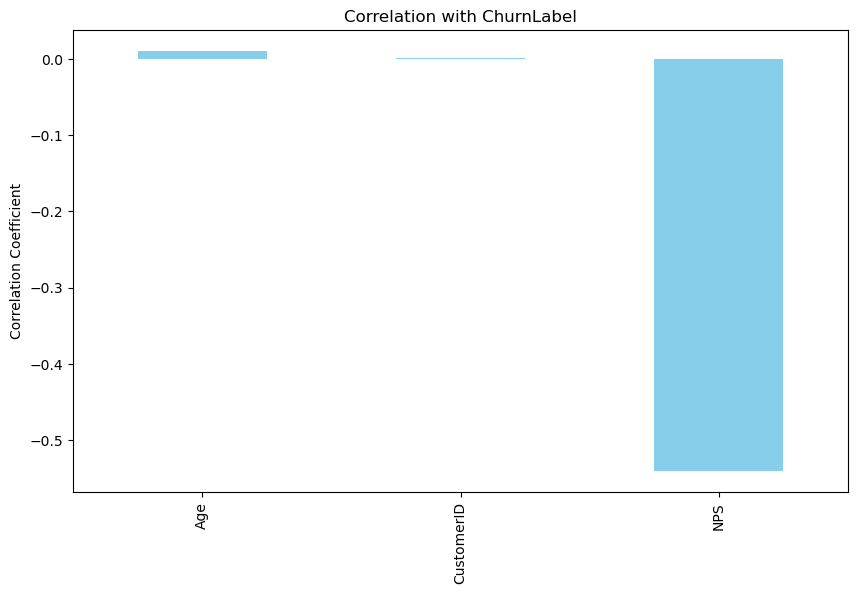

In [36]:
# Plot the correlation
plt.figure(figsize=(10, 6))
correlation.drop('ChurnLabel').plot(kind='bar', color='skyblue')
plt.title('Correlation with ChurnLabel')
plt.ylabel('Correlation Coefficient')
# plt.show()
print(correlation)

In [38]:
# We're going to be exploring the nested columns and see how they are nested
# List out all the nested columns
nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]

# Print out the first value of each of the columns
w1, w2, = 25, 100
for col in nested_columns:
    row = [col, df[col][0]]
    print('n| {:<{w1}} | {:<{w2}} |'.format(*row, w1=w1, w2=w2))


n| PurchaseHistory           | [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}] |
n| SubscriptionDetails       | {'Plan': 'Express', 'Start_Date': '2020-06-08', 'End_Date': '2022-10-27'}                            |
n| ServiceInteractions       | [{'Type': 'Call', 'Date': '2019-09-26'}, {'Type': 'Chat', 'Date': '2021-07-25'}, {'Type': 'Email', 'Date': '2020-04-13'}, {'Type': 'Chat', 'Date': '2020-11-15'}] |
n| PaymentHistory            | [{'Method': 'Credit Card', 'Late_Payments': 5}, {'Method': 'PayPal', 'Late_Payments': 11}, {'Method': 'Bank Transfer', 'Late_Payments': 24}] 

# Temporal analysis
We are going to take a look at how the churn rate changes over times to see if there are any recurring patterns


In [40]:
#  Convert the Timestamp to datetime format 
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract the month-year from the Timestamp
df['MonthYear'] = df['Timestamp'].dt.to_period('M')


In [42]:
# Group by monthYear and calculate the churn rate
# Customer left it's indicated by 1, customer stays it's indicated by 0
monthly_churn_rate = df.groupby('MonthYear')['ChurnLabel'].sum()


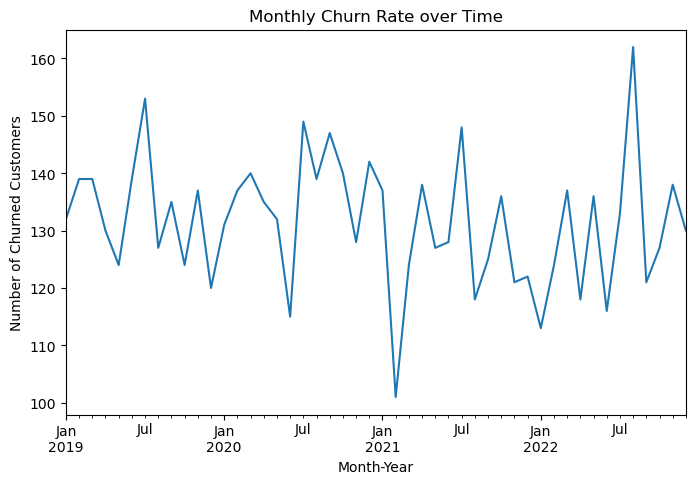

In [44]:
# Plot the churn rate over time
plt.figure(figsize=(8, 5))
monthly_churn_rate.plot()
plt.title('Monthly Churn Rate over Time')
plt.ylabel('Number of Churned Customers')
plt.xlabel('Month-Year')
plt.show()

In [46]:
# We also need to see if there are any patterns between the customer feedback 'Rating' and te 'ChurnLabel'
# Extract the ratings from the feedback column and creating a new column for it
df['FeedbackRating'] = df['Feedback'].apply(lambda x: eval(x)['Rating'])   # eval(x) is putting it in a list or dictionaries


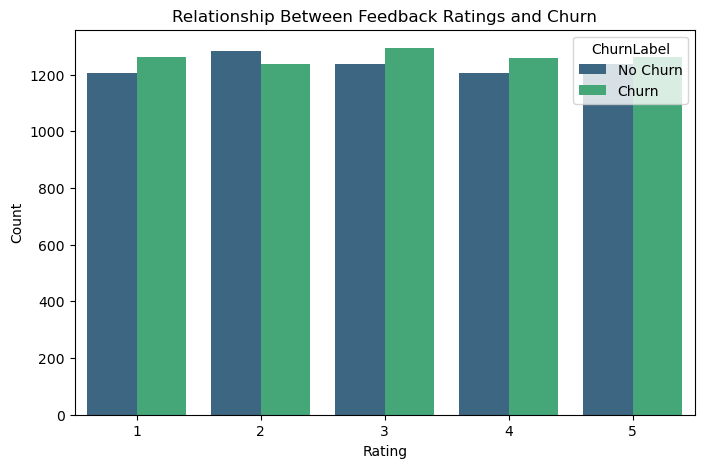

In [48]:
# Plotting the relationship between feedback rating and Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='FeedbackRating', data=df, hue='ChurnLabel', palette='viridis')
plt.title('Relationship Between Feedback Ratings and Churn')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='ChurnLabel', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()


From the visual, there doesn't seem to be any indication that the feedback rating affects the ChurnLabel


# Data Preprocessing and Feature Engineering

Here we will do:
-Create new features that may have predictive power

-Convert categorical variables to numerical variables, using encoding techniques

-Scal or normalize numeric variables if necessary (scaling means categorizing 
large values)

-Removing irrelevant features.

In [50]:
# Converting nested  values from string formats to list/dictionaries using 'literal_eval' function
# list nested columns

nested_column = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]


In [52]:
# Apply the literal_eval function
# Converting strings to list and dictionaries
# more features would be extracted in the dataset
for feature in nested_column:
    df[feature] = df[feature].apply(literal_eval)

# PurchaseHistory
df['PurchasedProducts'] = df['PurchaseHistory'].apply(lambda x: '|'.join([i['Product']for i in x]))
df['PurchaseFrequency'] = df['PurchaseHistory'].apply(lambda x: sum([i['Frequency']for i in x]))
df['PurchasedValue'] = df['PurchaseHistory'].apply(lambda x: sum([i['Value']for i in x]))

# SubscriptionDetails
df['SubscriptionPlan'] = df['SubscriptionDetails'].apply(lambda x: x['Plan'])
df['SubscriptionStartDate'] = df['SubscriptionDetails'].apply(lambda x: x['Start_Date'])
df['SubscriptionEndDate'] = df['SubscriptionDetails'].apply(lambda x: x['End_Date'])
df['SubscriptionDuration'] = (pd.to_datetime(df['SubscriptionEndDate']) - pd.to_datetime(df['SubscriptionStartDate'])).dt.days

# WebsiteUsage
df['WebsitePageViews'] = df['WebsiteUsage'].apply(lambda x: x['PageViews'])
df['WebsiteTimeSpent'] = df['WebsiteUsage'].apply(lambda x: x['TimeSpent(minutes)'])

# EngagementMetrics
df['EngagementMetricsLogins'] = df['EngagementMetrics'].apply(lambda x: x['Logins'])
df['EngagementMetricsFrequency'] = df['EngagementMetrics'].apply(lambda x: x['Frequency'])

# Feedback
df['FeedbackRating'] = df['Feedback'].apply(lambda x: x['Rating'])
df['FeedbackComment'] = df['Feedback'].apply(lambda x: x['Comment'])

# Marketing Communication
df['MarketingCommunicationNoOfEmails'] = df['MarketingCommunication'].apply(lambda x: len(x))

df['MarketingCommunicationOpenClickDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Clicked']) - pd.to_datetime(i['Email_Opened'])).total_seconds()
        for i in x if pd.notnull(i['Email_Clicked']) and pd.notnull(i['Email_Opened'])
    ])
)

df['MarketingCommunicationSentOpenDiff'] = df['MarketingCommunication'].apply(lambda x: len(x))

df['MarketingCommunicationOpenClickDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Opened']) - pd.to_datetime(i['Email_Sent'])).total_seconds()
        for i in x if pd.notnull(i['Email_Opened']) and pd.notnull(i['Email_Sent'])
    ])
)


# Special extraction from three columns:

- ServiceInteractions
  
-PaymentHistory

-ClickstreamData

-Check for the Unique Parameters/values in these columns


In [54]:
# Service Interactions
# Get all unique ServiceInteractions 'Types'
service_interaction_types = df['ServiceInteractions'].apply(lambda x: list(set([i['Type'] for i in x])))
Service_interaction_types = service_interaction_types.to_list()
unique_service_interaction_type = []
for i in service_interaction_types:
    unique_service_interaction_type.extend(i)
unique_service_interaction_type = list(set(unique_service_interaction_type))
print('All unique Service Interaction Types: ', unique_service_interaction_type)


# Get all the unique paymnent method History
payment_history_methods = df['PaymentHistory'].apply(lambda x: list(set([i['Method'] for i in x])))
payment_history_methods = payment_history_methods.to_list()
unique_payment_history_methods = []
for i in payment_history_methods:
    unique_payment_history_methods.extend(i)
unique_payment_history_methods = list(set(unique_payment_history_methods))
print('All unique Payment History Methods: ', unique_payment_history_methods)

# Get all unique ClickstreamData 'Action'

clickstream_data_actions = df['ClickstreamData'].apply(lambda x: list(set([i['Action'] for i in x])))
clickstream_data_actions = clickstream_data_actions.to_list()
unique_clickstream_data_actions = []
for i in clickstream_data_actions:
    unique_clickstream_data_actions.extend(i)
unique_clickstream_data_actions = list(set(unique_clickstream_data_actions))
print('All unique Clickstream Data Action: ', unique_clickstream_data_actions)

# From These three columns, we are going to be encoding more
# ServiceInteractions
for usit in unique_service_interaction_type:
    df[f'ServiceInteractions_{usit}'] = df['ServiceInteractions'].apply(lambda x: len([i for i in x if i['Type'] == usit]))

# PaymentHistory
df['PaymentHistoryNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x:  sum(i['Late_Payments'] for i in x))
df['PaymentHistoryNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x: np.mean([i['Late_Payments'] for i in x]))

# ClickstreamData
for ucda in unique_clickstream_data_actions:
    df[f'ClickStreamData_{ucda}'] = df['ClickstreamData'].apply(lambda x: len([i for i in x if i['Action'] == ucda]))

# See a subset of the new data
print(df.head())

# See all the columns we have now
print(df.columns)

All unique Service Interaction Types:  ['Call', 'Chat', 'Email']
All unique Payment History Methods:  ['PayPal', 'Credit Card', 'Bank Transfer']
All unique Clickstream Data Action:  ['Add to Cart', 'Click', 'Search']
   CustomerID                   Name  Age  Gender      Location  \
0        1001           Mark Barrett   31    Male    Andrewfort   
1        1002           Jeremy Welch   66  Female   Millerhaven   
2        1003          Brandon Patel   36  Female    Lozanostad   
3        1004            Tina Martin   62  Female  South Dustin   
4        1005  Christopher Rodriguez   68  Female    West James   

                           Email                Phone  \
0          allison74@example.net           3192528777   
1            fmiller@example.com    231-587-1818x8651   
2         jasonbrown@example.org        (270)633-9095   
3          matthew62@example.net   050.081.8706x11982   
4  shannonstrickland@example.org  +1-701-854-4915x724   

                                     

In [55]:
# Since we can't use all of our columns, we'll filter out the ones we need
# We are making are storing our new columns in a new variable- df_
df_ = df[[
    'Age',
    'Gender',
    'NPS',
    'ChurnLabel',
    'PurchaseFrequency',
    'PurchasedValue',
    'SubscriptionPlan',
    'WebsitePageViews',
    'WebsiteTimeSpent',
    'EngagementMetricsLogins',
    'EngagementMetricsFrequency',
    'FeedbackRating',
    'MarketingCommunicationNoOfEmails',
    'MarketingCommunicationOpenClickDiff',
    'MarketingCommunicationSentOpenDiff',
    'ServiceInteractions_Call',
    'ServiceInteractions_Email',
    'ServiceInteractions_Chat',
    'PaymentHistoryNoOfLatePayments',
    'ClickStreamData_Click',
    'ClickStreamData_Add to Cart',
    'ClickStreamData_Search',
    'SubscriptionDuration'
]]

print(df_.head())

# To see the name of the columns we have now:
print(df_.columns)

# To view the first value of each column
print(df.loc[0])

   Age  Gender  NPS  ChurnLabel  PurchaseFrequency  PurchasedValue  \
0   31    Male    3           1                 38         3994.72   
1   66  Female    6           0                  4         2844.35   
2   36  Female    3           0                 14         1866.52   
3   62  Female    1           1                 28         1378.64   
4   68  Female    3           0                 39         2425.05   

  SubscriptionPlan  WebsitePageViews  WebsiteTimeSpent  \
0          Express                49                15   
1              Pro               100                 9   
2        Essential                 1                97   
3            Smart                25                31   
4            Basic                77                51   

   EngagementMetricsLogins  ... MarketingCommunicationOpenClickDiff  \
0                       19  ...                          70675200.0   
1                        9  ...                           9504000.0   
2                

When you want to build a machine learning modeling, You can't have values in string format it has to be in numerical
format.You can change that by encoding the data. E.g Gender and SubscriptionPlan and EngagementMetricsFrequency are
in string. Before you encode a particular row, you check if there are too many values compared to the sie of the data
-set. E.G When there are too many unique type of frequency, it's best to drop it


In [57]:
# Check for number of unique values
print('Total Dataset Length: ', len(df_))
df_[['Gender', 'SubscriptionPlan', 'EngagementMetricsFrequency']].nunique()


Total Dataset Length:  12483


Gender                         2
SubscriptionPlan              20
EngagementMetricsFrequency     3
dtype: int64

# Encoding the string Parameters


In [59]:
# Gender encoding
gender_map = {'Male': 0, 'Female': 1}

# SubscriptionPlan encoding
unique_subscription_plans = df_['SubscriptionPlan'].unique()
subscription_plan_map = {unique_subscription_plans[i]: i for i in range(len(unique_subscription_plans))}

# EngagementMetricsFrequency
unique_engagement_frequency = df_['EngagementMetricsFrequency'].unique()
engagement_frequency_map = {unique_engagement_frequency[i]: i for i in range(len(unique_engagement_frequency))}

# Encode
df_.loc['Gender'] = df_['Gender'].map(gender_map)
df_.loc['SubscriptionPlan'] = df_['SubscriptionPlan'].map(subscription_plan_map)
df_.loc['EngagementMetricsFrequency'] = df_['EngagementMetricsFrequency'].map(engagement_frequency_map)

print(df.loc[0])

CustomerID                                                                          1001
Name                                                                        Mark Barrett
Age                                                                                   31
Gender                                                                              Male
Location                                                                      Andrewfort
Email                                                              allison74@example.net
Phone                                                                         3192528777
Address                                61234 Shelley Heights Suite 467\nCohentown, GU...
Segment                                                                        Segment B
PurchaseHistory                        [{'Product': 'Frozen Cocktail Mixes', 'Frequen...
SubscriptionDetails                    {'Plan': 'Express', 'Start_Date': '2020-06-08'...
ServiceInteractions  

# Plot correlation Matrix


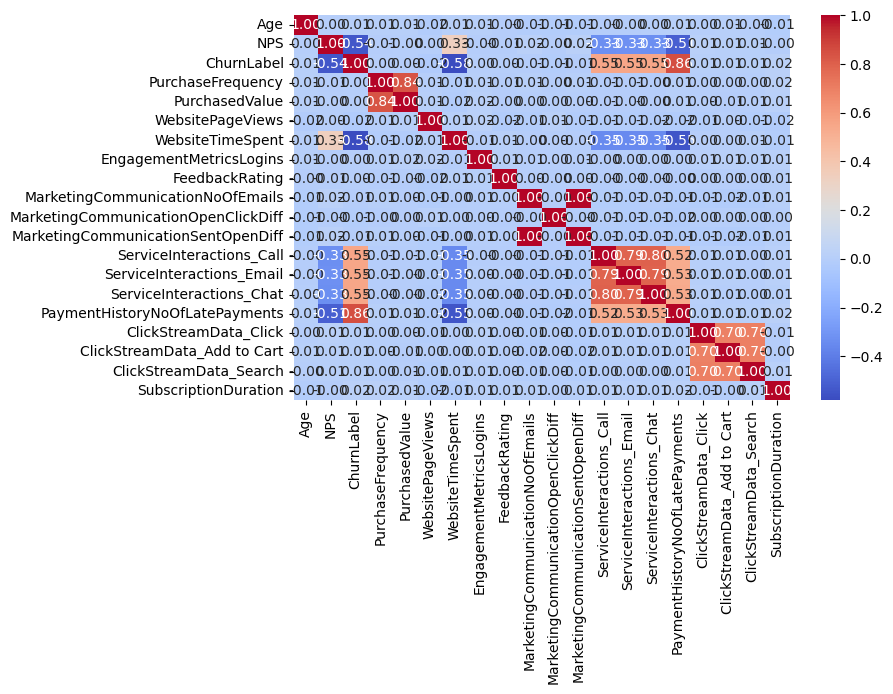

In [60]:
df_corr = df_.select_dtypes(include=[float, int]).corr()
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='coolwarm', ax=ax)
plt.show()

In [80]:
# Split data into train test and Validation sets
x = df_.drop(columns=['ChurnLabel'])
y = df_['ChurnLabel']

x = pd.get_dummies(x, drop_first=True)

x_train, x_other, y_train, y_other = train_test_split(x, y, train_size=0.8, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_other, y_other, test_size=0.3, random_state=42)

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_val = ss.transform(x_val)
x_test = ss.transform(x_test)

# Impute missing values with the mean of each column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_val = imputer.transform(x_val)
x_test = imputer.transform(x_test)


# Impute missing values in y_train
most_frequent = y_train.mode()[0]
y_train.fillna(most_frequent, inplace=True)

# Fit logistic regression
lr = LogisticRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

# Check for NaN values in predictions
print(f'Number of NaNs in predictions: {np.isnan(y_pred).sum()}')
print(f'Number of NaNs in y_test: {np.isnan(y_test).sum()}')
print(f'y_test data type: {type(y_test)}')
y_test = pd.Series(y_test)

# Example: Fill NaN with the most frequent class
mode_value = y_train.mode()[0]  # or any other strategy
y_test.fillna(mode_value, inplace=True)

Number of NaNs in predictions: 0
Number of NaNs in y_test: 1
y_test data type: <class 'pandas.core.series.Series'>


# Data Modeling
Two different models for modelling
- LogisticRegression
- DecisionTreeClassifier

# Metrics
- Accuracy Score
- Precision score
- Recall score
- F1 Score

## Define an evaluation function


Train Accuracy Score: 0.9705646776131358
Train Precision Score: 0.9652517275419545
Train Recall Score: 0.9764329938086679
Train F1 Score: 0.9708101667990469
Validation Accuracy Score: 0.9626666666666667
Validation Precision Score: 0.9526315789473684
Validation Recall Score: 0.9731182795698925
Validation F1 Score: 0.9627659574468085
Train Accuracy Score: 0.9705646776131358
Train Precision Score: 0.9652517275419545
Train Recall Score: 0.9764329938086679
Train F1 Score: 0.9708101667990469
Validation Accuracy Score: 0.9626666666666667
Validation Precision Score: 0.9526315789473684
Validation Recall Score: 0.9731182795698925
Validation F1 Score: 0.9627659574468085
Train Accuracy Score: 0.9766720064076893
Train Precision Score: 0.9770977295162883
Train Recall Score: 0.9769048559020924
Train F1 Score: 0.9770012831902083
Validation Accuracy Score: 0.972
Validation Precision Score: 0.9710526315789474
Validation Recall Score: 0.9736147757255936
Validation F1 Score: 0.9723320158102767
LogisticReg

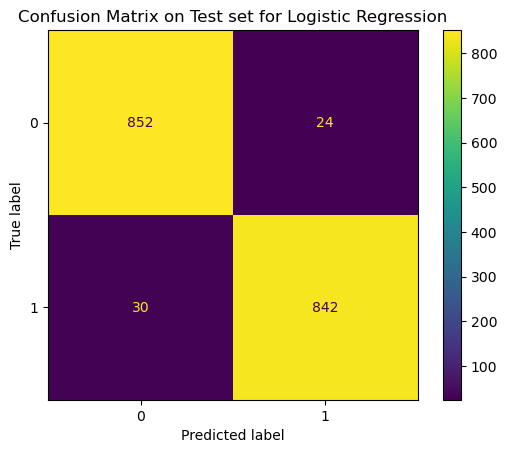

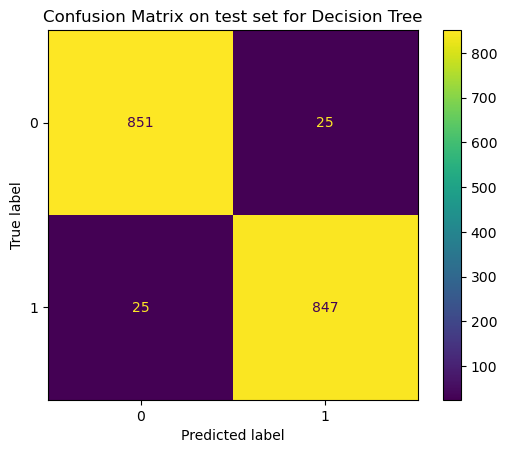

In [102]:

def evaluate(x, y, model, subset=''):
    y_pred = model.predict(x)
    print(f'{subset} Accuracy Score: {accuracy_score(y_pred, y)}')
    print(f'{subset} Precision Score: {precision_score(y_pred, y)}')
    print(f'{subset} Recall Score: {recall_score(y_pred, y)}')
    print(f'{subset} F1 Score: {f1_score(y_pred, y)}')

# Build a model
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Evaluate the model on train and validation subset
evaluate(x_train, y_train, lr, 'Train')
evaluate(x_val, y_val, lr, 'Validation')
# Evaluate the model on train and validation subset
evaluate(x_train, y_train, lr, 'Train')
evaluate(x_val, y_val, lr, 'Validation')

# Modelling with Decision Tree
# Build the model

# max_depth - How deep should the decision tree fit into the model
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train, y_train)

# Evaluate on thr train and validation subsets
evaluate(x_train, y_train, dt, subset='Train')
evaluate(x_val, y_val, dt, subset='Validation')

# Evaluation on the test set
evaluate(x_test, y_test, lr, 'LogisticRegression Test')
evaluate(x_test, y_test, dt, 'DecisionTreeClassifier Test')

# Plotting a confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

lr_y_pred = lr.predict(x_test)
logistic_regression_confusion_matrix = confusion_matrix(y_test, lr_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=logistic_regression_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test set for Logistic Regression')
plt.show()

dt_y_pred = dt.predict(x_test)
decision_tree_confusion_matrix = confusion_matrix(y_test, dt_y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=decision_tree_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on test set for Decision Tree')
plt.show()

# Conclusion
- The number of Service Interactions the customer has had through call, email and chat.
- The number of times the customer has made late payments
- The time spent on the company's website.
- The net Promoter Score (NPS).
- These parameters would help us know the number of customers that would churn and not churn.